In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("KM_Model.jl")
includet("../Scripts/Impurity.jl")

In [30]:
Nx = 4
Ny = 4
p = 1
q = 2
pn = 3
U = 1000

N_Site = Nx*Ny
N = N_Site
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

V = 10
NPin = 2

2

In [31]:
matrix = KM(Nx, Ny, t, p, q);

In [32]:
V0 = [V,V]; Imp_Site = [1,2]
Impurity_Data = Impurity(V0, Imp_Site)

Impurity([10.0, 10.0], [1, 2])

In [39]:
ParameterInfo(NPin, pn, Nx, Ny, p, q)

Lattice: 4x4
The Number of Flux per Unit-Cell (ϕ) = 1//2
Filling Fraction (ν) = 3//8 (The Number of Quasiholes = 2)
The Number of Flux Quanta = 6 (Delocalised Number = 0)
The Total Number of Particle = 3
The Number of State of Ground Degeneracy = 2


In [45]:
HardCore=true
HTotalSub, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [46]:
Impurity_H_proj_hard_core = Imp_H(HTotalSub, Sub_Number_MB_Operator_List, Impurity_Data);

In [47]:
ϵ_proj_hard_core, λ_proj_hard_core = eigenstates(Impurity_H_proj_hard_core);


In [48]:
HardCore=false
HTotalSub, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [49]:
Impurity_H_proj_finite = Imp_H(HTotalSub, Sub_Number_MB_Operator_List, Impurity_Data);

In [50]:
ϵ_proj_finite, λ_proj_finite = eigenstates(Impurity_H_proj_finite);


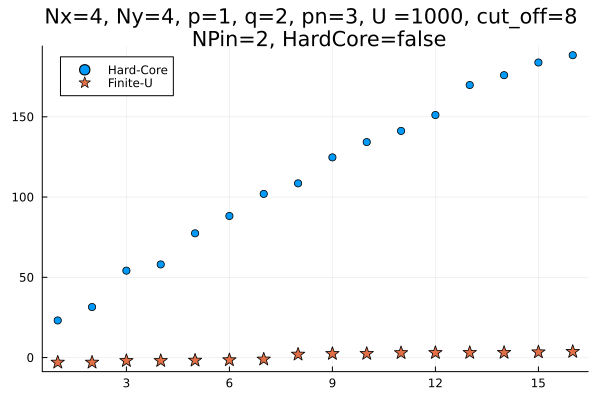

In [57]:
n = 1 
m = 16

scatter(ϵ_proj_hard_core[n:m],label="Hard-Core",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off) \n NPin=$(NPin)")
scatter!(ϵ_proj_finite[n:m], markershape=:star,markersize=7, label="Finite-U")

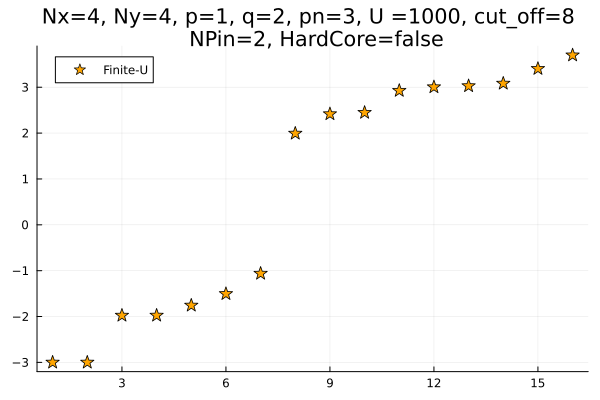

In [82]:
scatter(ϵ_proj_finite[n:m], markershape=:star,markersize=7, color=:orange, label="Finite-U",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off) \n NPin=$(NPin)")

In [58]:
HardCore = true
HTotal, basis_mb = H_Hubbard(N, pn, matrix, HardCore)

num_list = get_num_list(N)
basis_sp = NLevelBasis(N)
Number_MB_Operator_List = get_num_mb_op(N, basis_sp, num_list, basis_mb);

In [59]:
Impurity_H_hard_core = Imp_H(HTotal, Number_MB_Operator_List, Impurity_Data);

In [61]:
ϵ_hard_core, λ_hard_core = eigenstates(Impurity_H_hard_core);

In [62]:
HardCore = false
HTotal, basis_mb = H_Hubbard(N, pn, matrix, HardCore)

num_list = get_num_list(N)
basis_sp = NLevelBasis(N)
Number_MB_Operator_List = get_num_mb_op(N, basis_sp, num_list, basis_mb);

In [63]:
Impurity_H_finite_u = Imp_H(HTotal, Number_MB_Operator_List, Impurity_Data);

In [64]:
ϵ_finite_u, λ_finite_u = eigenstates(Impurity_H_finite_u);

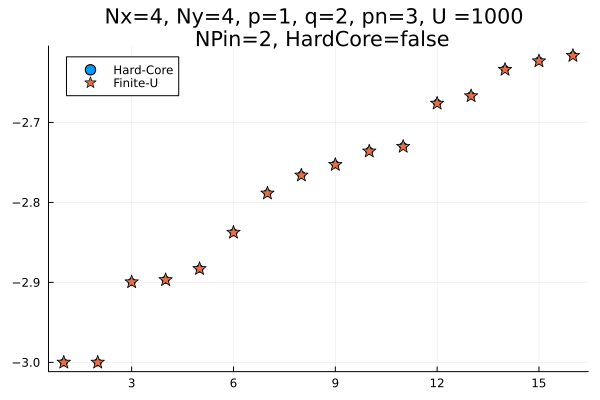

In [66]:
n = 1 
m = 16

scatter(ϵ_hard_core[n:m],label="Hard-Core",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n NPin=$(NPin)")
scatter!(ϵ_finite_u[n:m], markershape=:star,markersize=7, label="Finite-U")